<a href="https://colab.research.google.com/github/hvr2026/Clustering-Algorithms/blob/main/Clustering%20of%20Timeseries%20Data/%5BAnother_Example%5D_Clustering_of_Timeseries_Data_using_Pre_Trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install tslearn pyts scikit-learn matplotlib seaborn pandas numpy tsfresh plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from pyts.approximation import SymbolicAggregateApproximation
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
# Step 1: Generate synthetic time series data
from tslearn.generators import random_walk_blobs
n_ts_per_blob = 50
n_blobs = 3
X, y_true = random_walk_blobs(n_ts_per_blob=n_ts_per_blob, n_blobs=n_blobs, random_state=42)

# Normalize the time series data
scaler = TimeSeriesScalerMinMax(value_range=(0, 1))
X_scaled = scaler.fit_transform(X)



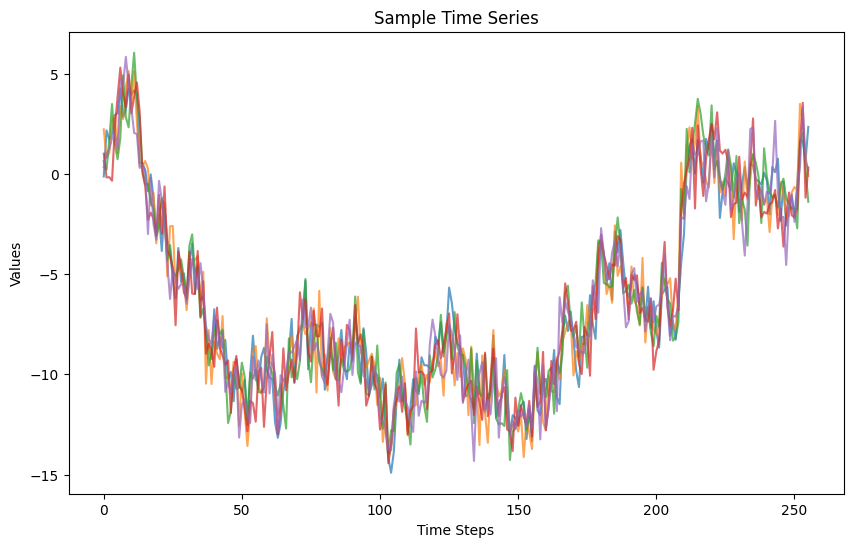

In [9]:
# Step 2: Visualize the raw time series
plt.figure(figsize=(10, 6))
for ts in X[:5]:  # Show a few samples
    plt.plot(ts.ravel(), alpha=0.7)
plt.title("Sample Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.show()



In [12]:
# Step 3: Apply KMeans clustering to the time series data
n_clusters = 3
km = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
clusters = km.fit_predict(X_scaled)



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


0.547 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


0.356 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


0.356 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.4s


0.356 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s


In [11]:
# Step 4: Evaluate clustering performance
sil_score = silhouette_score(X_scaled.reshape(X_scaled.shape[0], -1), clusters)
print(f"Silhouette Score: {sil_score:.2f}")



Silhouette Score: 0.77


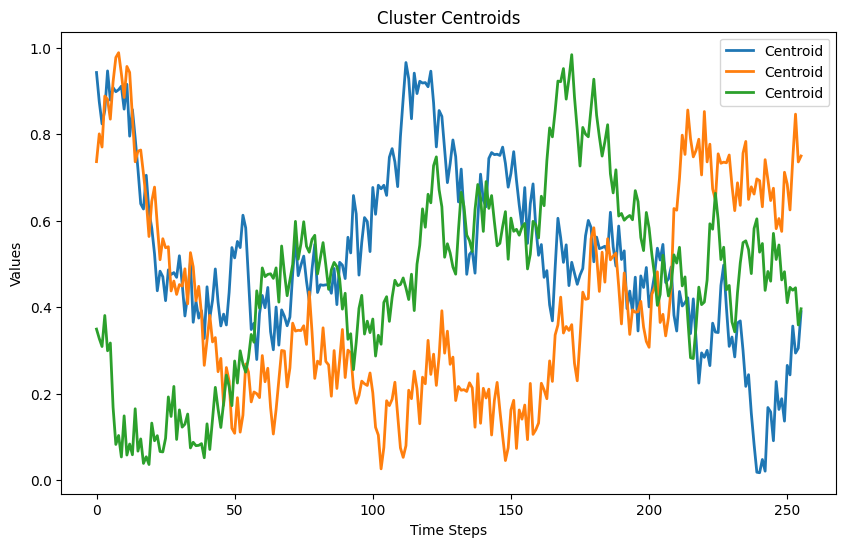

In [13]:
# Step 5: Visualize the cluster centroids
plt.figure(figsize=(10, 6))
for centroid in km.cluster_centers_:
    plt.plot(centroid.ravel(), label="Centroid", linewidth=2)
plt.title("Cluster Centroids")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()



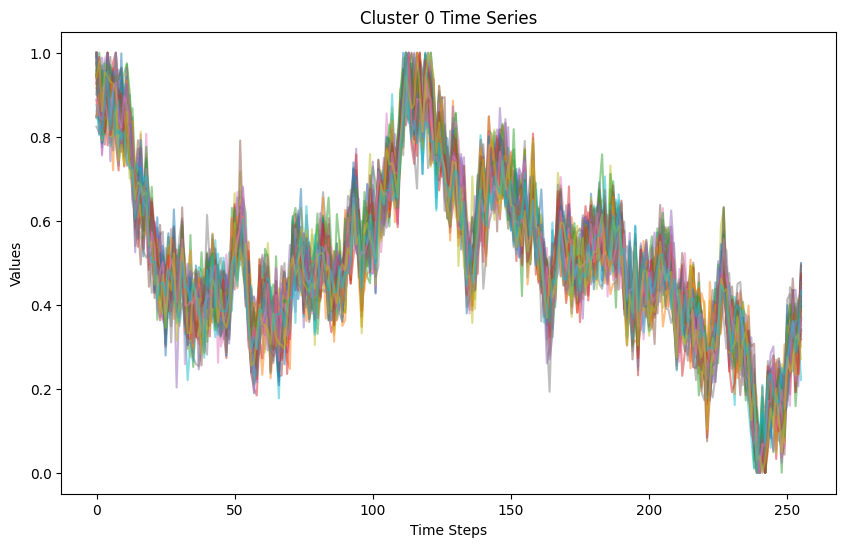

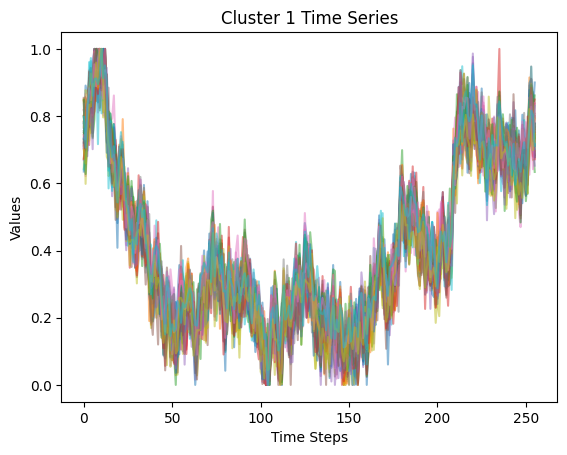

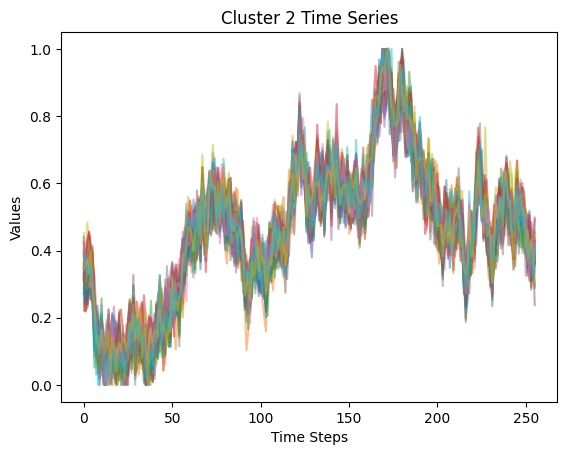

In [14]:
# Step 6: Visualize the time series clustered by labels
plt.figure(figsize=(10, 6))
for label in range(n_clusters):
    cluster_series = X_scaled[clusters == label]
    for ts in cluster_series:
        plt.plot(ts.ravel(), alpha=0.5)
    plt.title(f"Cluster {label} Time Series")
    plt.xlabel("Time Steps")
    plt.ylabel("Values")
    plt.show()

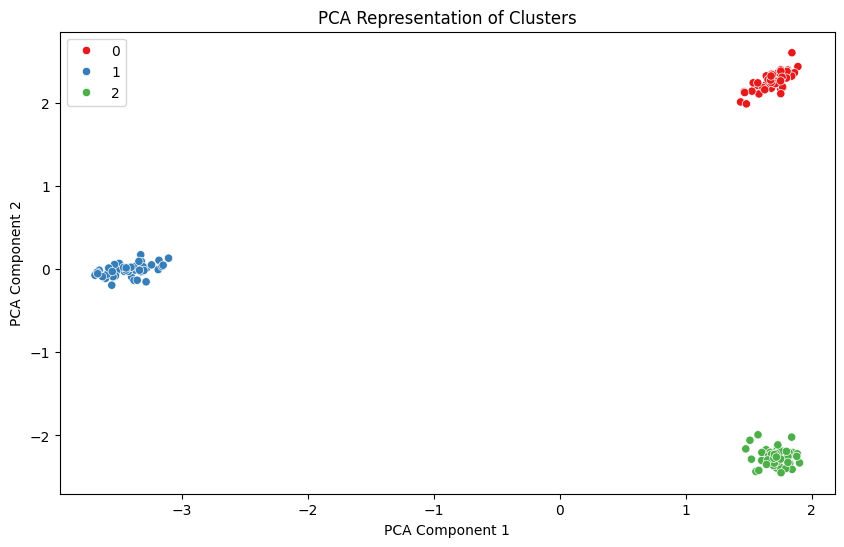

In [6]:
# Step 7: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_flat = X_scaled.reshape(X_scaled.shape[0], -1)
X_pca = pca.fit_transform(X_flat)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set1")
plt.title("PCA Representation of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()




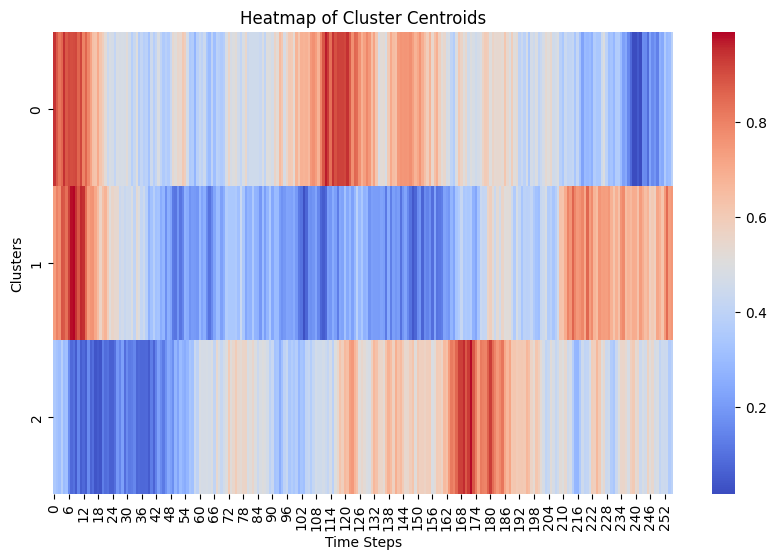

In [7]:
# Step 8: Time series heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(km.cluster_centers_.squeeze(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Time Steps")
plt.ylabel("Clusters")
plt.show()

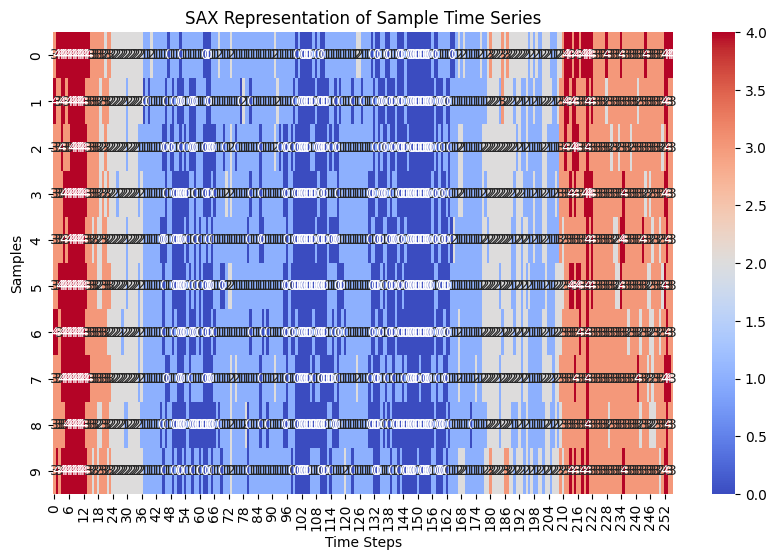

In [5]:
# Step 9: Extract features using a pretrained time-series model (e.g., SAX in pyts)
sax = SymbolicAggregateApproximation(n_bins=5, strategy='uniform')
X_sax = sax.transform(X_scaled.squeeze())

# Convert SAX symbols to integers for heatmap visualization
symbol_to_int = {symbol: idx for idx, symbol in enumerate(sorted(set(X_sax.ravel())))}
X_sax_numeric = np.vectorize(symbol_to_int.get)(X_sax)

# Plot the heatmap of SAX representation
plt.figure(figsize=(10, 6))
sns.heatmap(X_sax_numeric[:10], cmap="coolwarm", annot=True, cbar=True)
plt.title("SAX Representation of Sample Time Series")
plt.xlabel("Time Steps")
plt.ylabel("Samples")
plt.show()

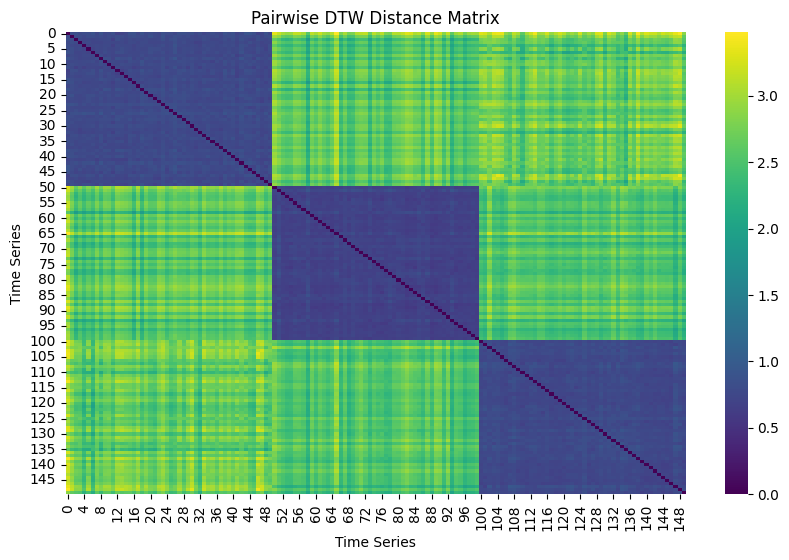

In [15]:
# Step 10: Generate pairwise distance matrix (DTW)
distance_matrix = cdist_dtw(X_scaled)
plt.figure(figsize=(10, 6))
sns.heatmap(distance_matrix, cmap="viridis")
plt.title("Pairwise DTW Distance Matrix")
plt.xlabel("Time Series")
plt.ylabel("Time Series")
plt.show()

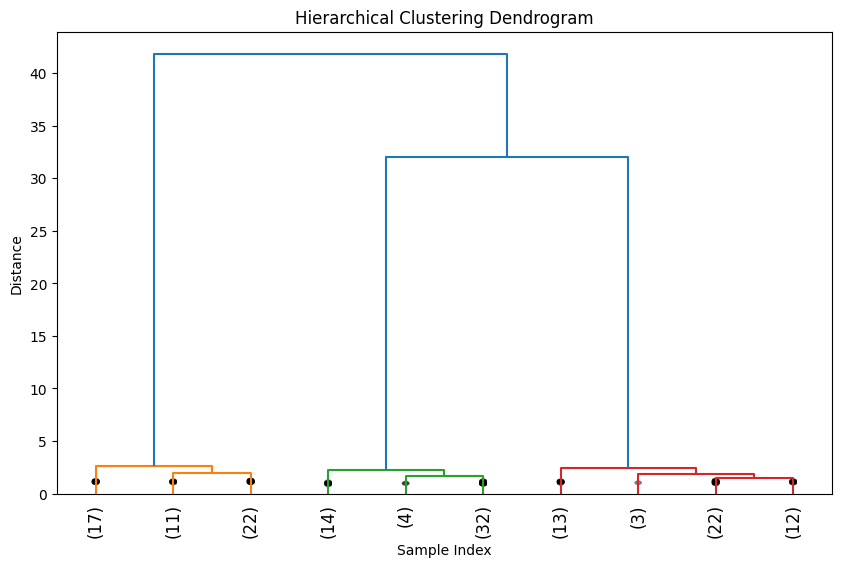

In [17]:
# Step 11: Visualize dendrogram for hierarchical clustering
Z = linkage(X_flat, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="lastp", p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()



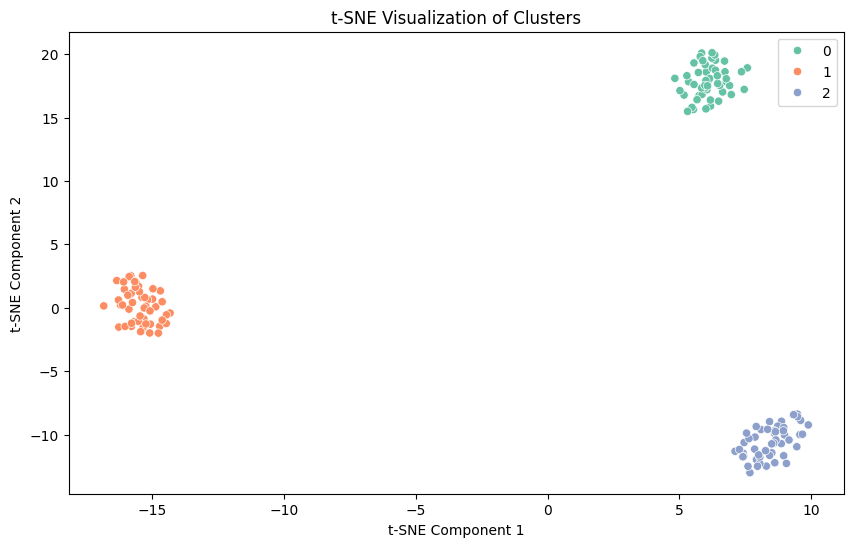

In [18]:
# Step 12: t-SNE visualization of clusters
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="Set2")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()



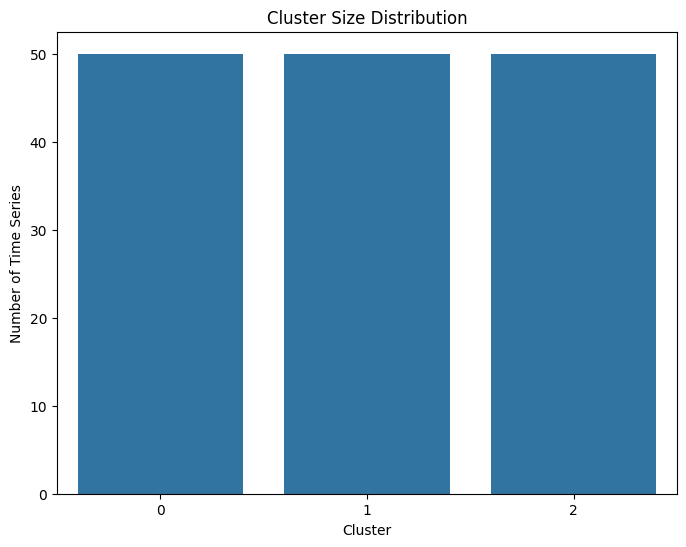

In [19]:
# Step 13: Visualize cluster size distribution
cluster_sizes = pd.DataFrame({"Cluster": clusters}).value_counts().reset_index()
cluster_sizes.columns = ["Cluster", "Size"]

plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Size", data=cluster_sizes)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Time Series")
plt.show()



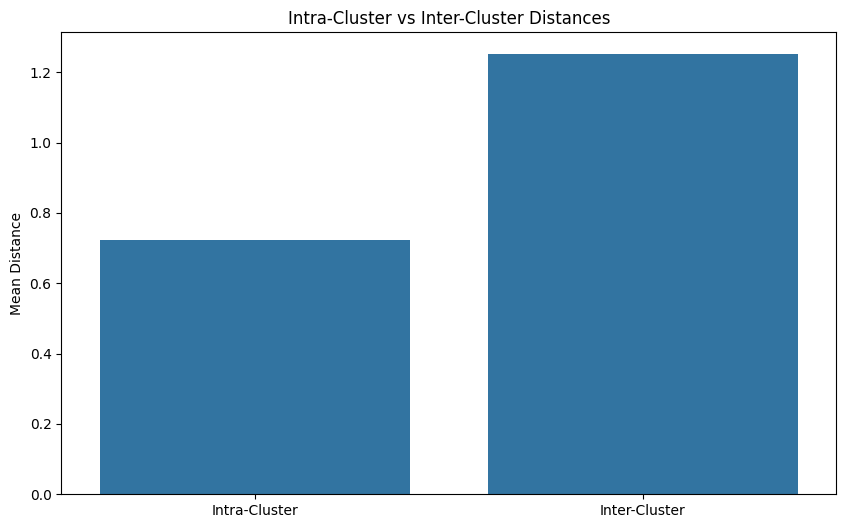

In [20]:
# Step 14: Intra-cluster and inter-cluster distances
intra_cluster_distances = [distance_matrix[clusters == label][:, clusters == label].mean() for label in range(n_clusters)]
inter_cluster_distances = np.mean(distance_matrix) - np.array(intra_cluster_distances)

plt.figure(figsize=(10, 6))
sns.barplot(x=["Intra-Cluster", "Inter-Cluster"], y=[np.mean(intra_cluster_distances), np.mean(inter_cluster_distances)])
plt.title("Intra-Cluster vs Inter-Cluster Distances")
plt.ylabel("Mean Distance")
plt.show()



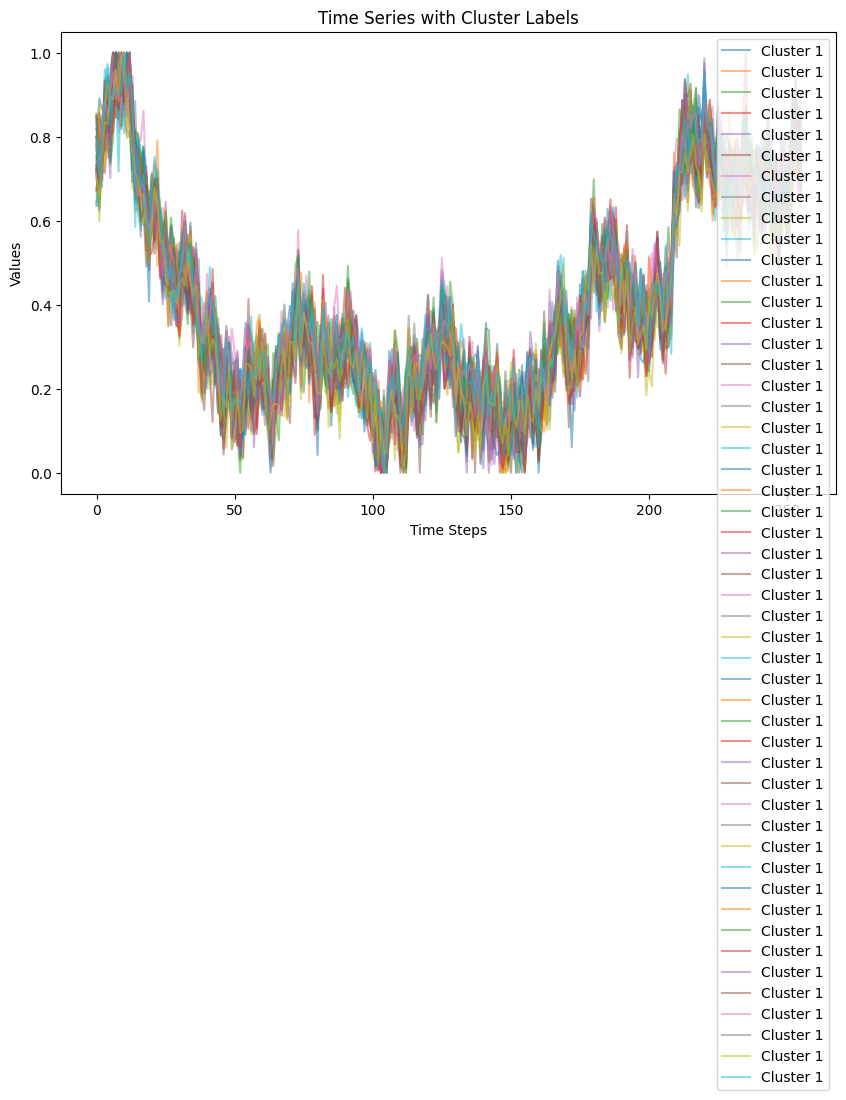

In [21]:
# Step 15: Overlay cluster labels on raw time series
plt.figure(figsize=(10, 6))
for ts, label in zip(X_scaled[:50], clusters[:50]):  # Show a subset
    plt.plot(ts.ravel(), alpha=0.5, label=f"Cluster {label}")
plt.title("Time Series with Cluster Labels")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()

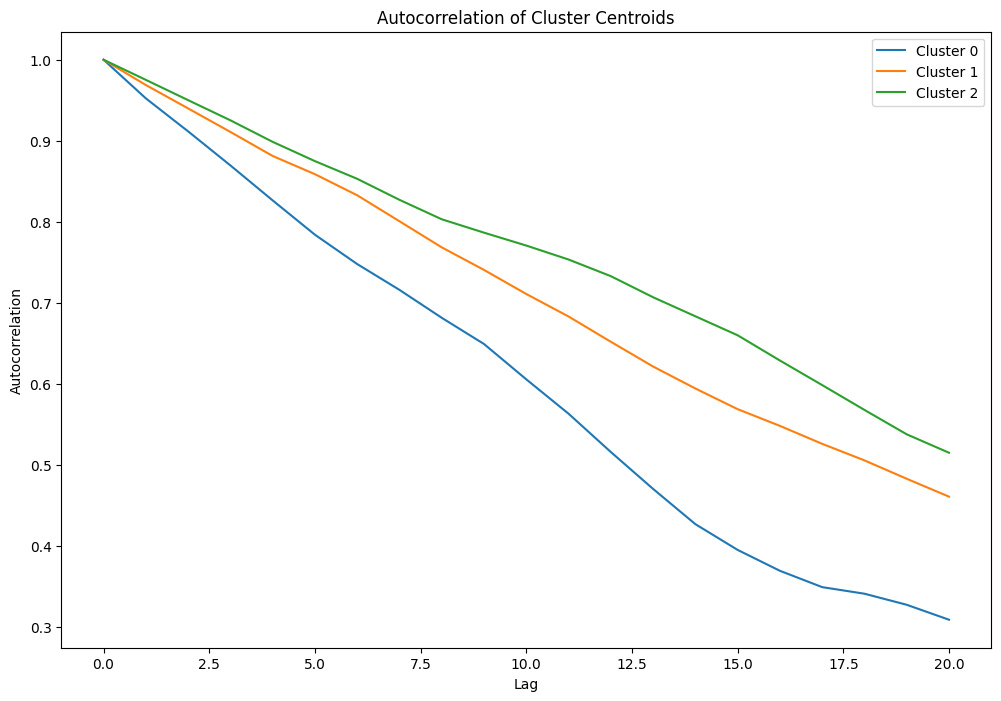

In [22]:
# Step 16: Autocorrelation analysis for each cluster
from statsmodels.tsa.stattools import acf

plt.figure(figsize=(12, 8))
for cluster_label in range(n_clusters):
    cluster_series = X_scaled[clusters == cluster_label]
    mean_series = np.mean(cluster_series, axis=0)
    autocorr = acf(mean_series.ravel(), fft=True, nlags=20)
    plt.plot(autocorr, label=f'Cluster {cluster_label}')
plt.title("Autocorrelation of Cluster Centroids")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.show()

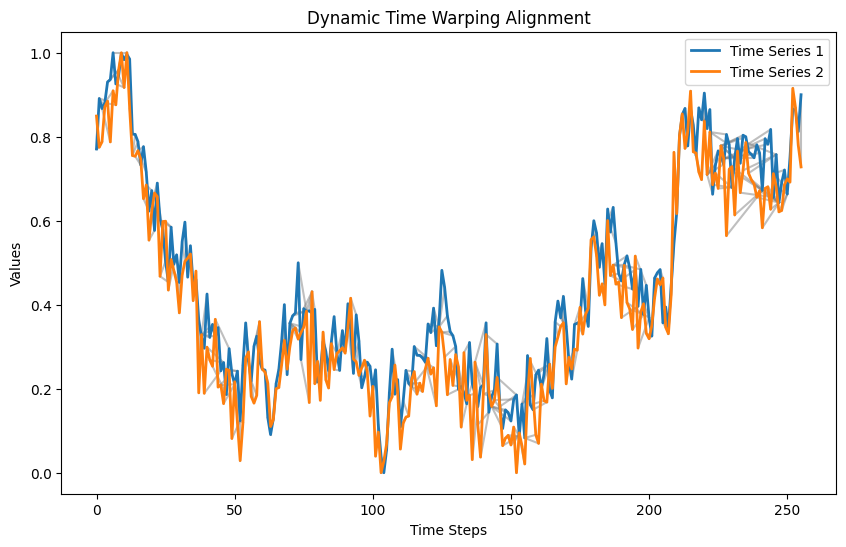

In [23]:
# Step 17: Dynamic Time Warping alignment visualization
from tslearn.metrics import dtw_path

ts1 = X_scaled[0].ravel()
ts2 = X_scaled[1].ravel()
path, dist = dtw_path(ts1, ts2)

plt.figure(figsize=(10, 6))
for (i, j) in path:
    plt.plot([i, j], [ts1[i], ts2[j]], color='gray', alpha=0.5)
plt.plot(ts1, label="Time Series 1", linewidth=2)
plt.plot(ts2, label="Time Series 2", linewidth=2)
plt.title("Dynamic Time Warping Alignment")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()

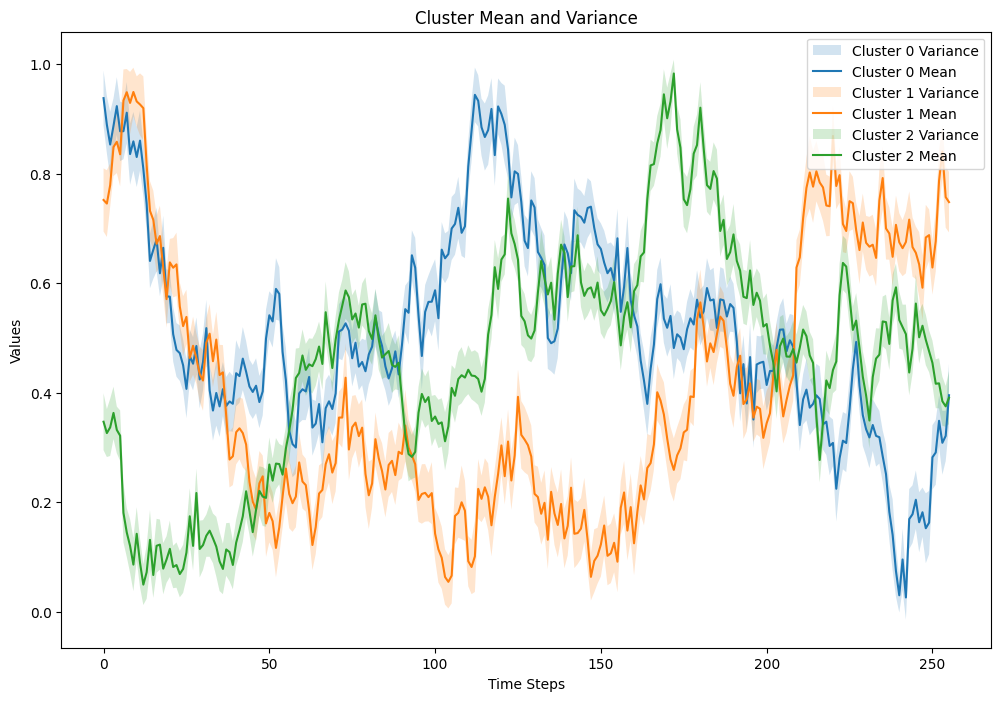

In [24]:
# Step 18: Cluster-wise mean and variance of time series
plt.figure(figsize=(12, 8))
for cluster_label in range(n_clusters):
    cluster_series = X_scaled[clusters == cluster_label]
    mean_series = np.mean(cluster_series, axis=0)
    std_dev = np.std(cluster_series, axis=0)
    plt.fill_between(range(mean_series.shape[0]),
                     mean_series.ravel() - std_dev.ravel(),
                     mean_series.ravel() + std_dev.ravel(),
                     alpha=0.2, label=f'Cluster {cluster_label} Variance')
    plt.plot(mean_series.ravel(), label=f'Cluster {cluster_label} Mean')
plt.title("Cluster Mean and Variance")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()


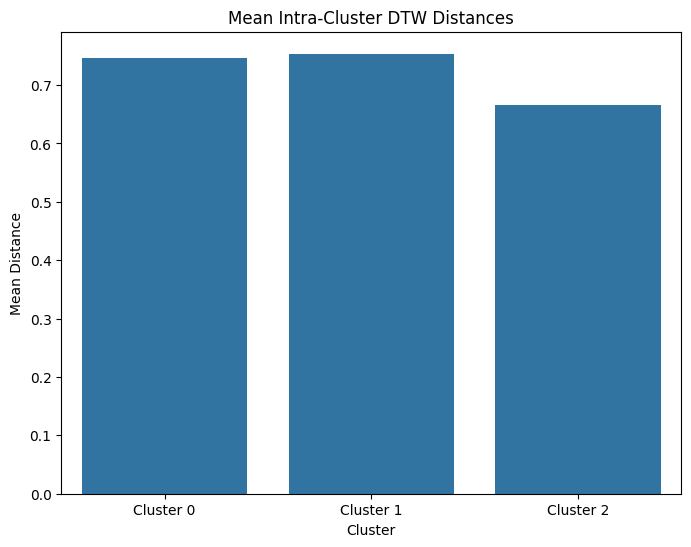

In [25]:
# Step 19: Analyze distribution of DTW distances within clusters
intra_cluster_dtw_distances = []
for cluster_label in range(n_clusters):
    cluster_series = X_scaled[clusters == cluster_label]
    distances = cdist_dtw(cluster_series)
    intra_cluster_dtw_distances.append(np.mean(distances))

plt.figure(figsize=(8, 6))
sns.barplot(x=[f"Cluster {i}" for i in range(n_clusters)], y=intra_cluster_dtw_distances)
plt.title("Mean Intra-Cluster DTW Distances")
plt.xlabel("Cluster")
plt.ylabel("Mean Distance")
plt.show()

In [26]:
# Step 20: Interactive visualization of time series with Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=n_clusters, cols=1, shared_xaxes=True, subplot_titles=[f"Cluster {i}" for i in range(n_clusters)])
for cluster_label in range(n_clusters):
    cluster_series = X_scaled[clusters == cluster_label]
    for ts in cluster_series:
        fig.add_trace(go.Scatter(y=ts.ravel(), mode='lines', name=f'Cluster {cluster_label}'), row=cluster_label + 1, col=1)
fig.update_layout(height=400 * n_clusters, title_text="Interactive Time Series by Clusters", showlegend=False)
fig.show()


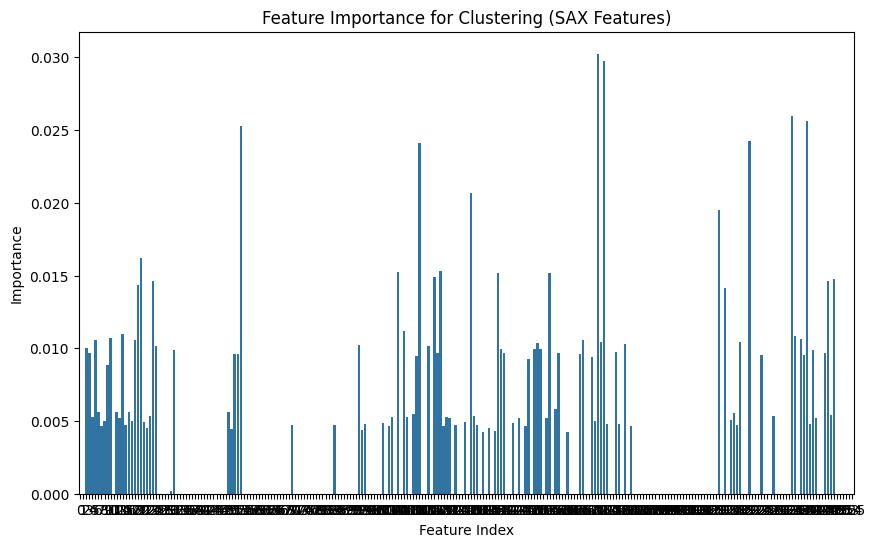

In [28]:
# Step 21: Analyze feature importance in clustering using SAX features

# Convert SAX symbols to integers
symbol_to_int = {symbol: idx for idx, symbol in enumerate(sorted(set(X_sax.ravel())))}
X_sax_numeric = np.vectorize(symbol_to_int.get)(X_sax)

# Train RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_sax_numeric, clusters)
importances = clf.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(importances)), y=importances)
plt.title("Feature Importance for Clustering (SAX Features)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


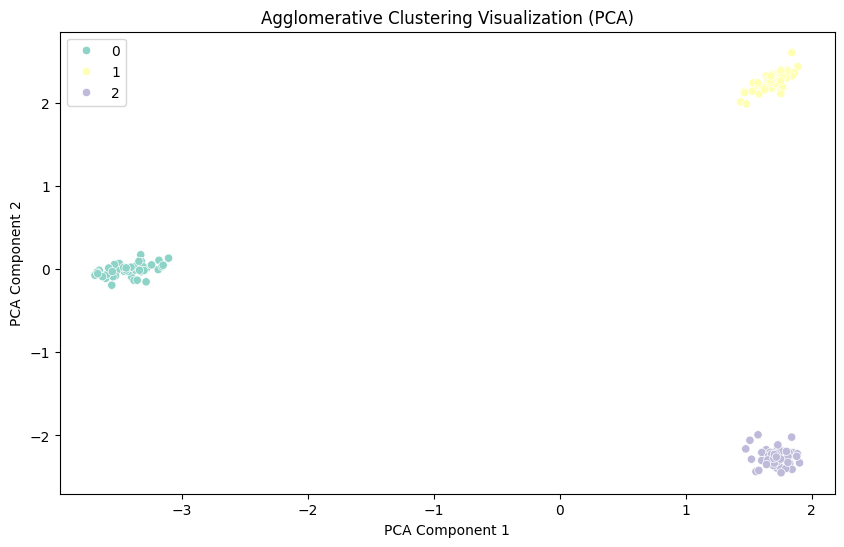

In [29]:
# Step 22: Compare clustering results using another algorithm (e.g., Agglomerative Clustering)
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agglo_clusters = agglo.fit_predict(X_flat)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_clusters, palette="Set3")
plt.title("Agglomerative Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


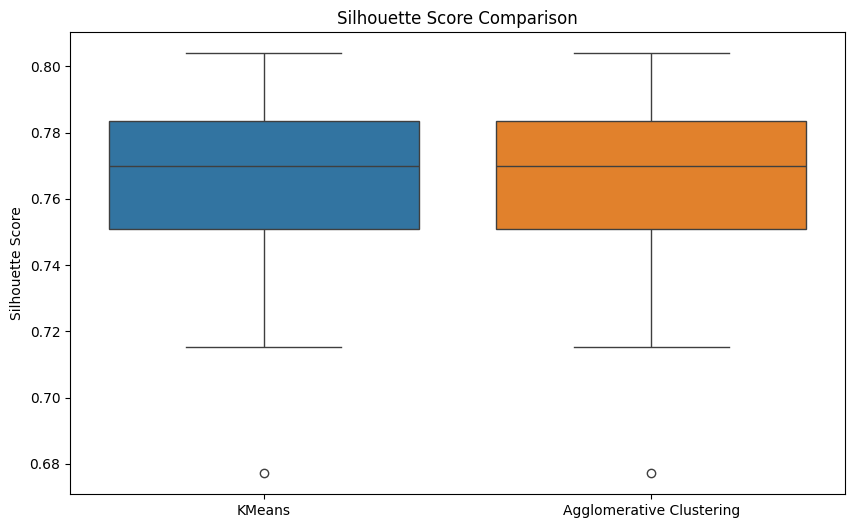

In [30]:
# Step 23: Analyze silhouette scores for different clustering algorithms
from sklearn.metrics import silhouette_samples

silhouette_vals_kmeans = silhouette_samples(X_flat, clusters)
silhouette_vals_agglo = silhouette_samples(X_flat, agglo_clusters)

plt.figure(figsize=(10, 6))
sns.boxplot(data=[silhouette_vals_kmeans, silhouette_vals_agglo])
plt.title("Silhouette Score Comparison")
plt.xticks([0, 1], ['KMeans', 'Agglomerative Clustering'])
plt.ylabel("Silhouette Score")
plt.show()

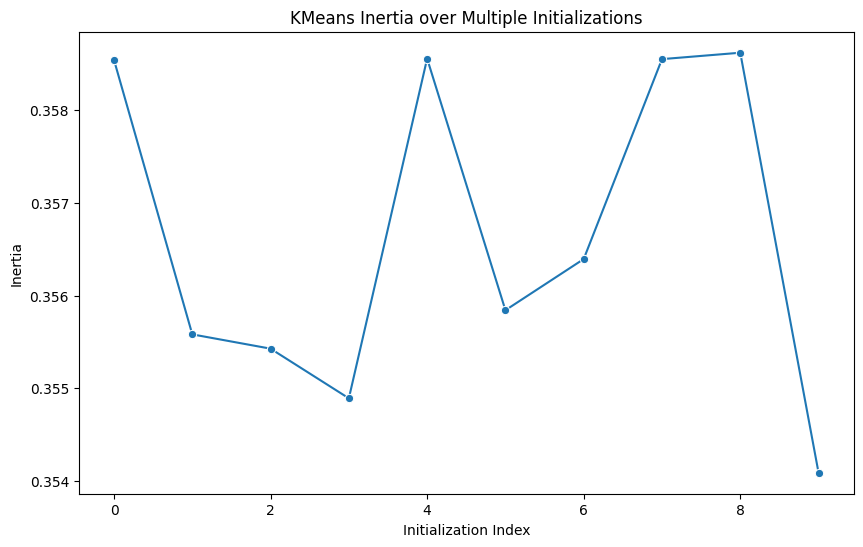

In [33]:
# Step 24: Explore clustering stability over random initialization
kmeans_multiple = [TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=i).fit(X_scaled) for i in range(10)]
inertia_values = [model.inertia_ for model in kmeans_multiple]

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(10), y=inertia_values, marker="o")
plt.title("KMeans Inertia over Multiple Initializations")
plt.xlabel("Initialization Index")
plt.ylabel("Inertia")
plt.show()